# MFCC Extraction with [Librosa](https://librosa.org/doc/latest/index.html) and Kaldi
## Speech and Language Understanding Exercises (SLU) Summer 2021
## Exercise 2
- Import and visual audio file with librosa
- Extract Melspectrogram and MFCC with librosa
- Examine/visualize features
- Extract MFCC with Kaldi

# Import and visualize audio file with Librosa

In [ ]:
!pip install librosa
!pip install numpy

In [1]:
import librosa #librosa is a python package for music and audio analysis.
import librosa.display
import matplotlib.pyplot as plt
from IPython.display import Audio 
import numpy as np

### [Sox](http://sox.sourceforge.net/) is another useful tool for speech processing. You can quickly examine your audio file using 'soxi'

In [2]:
!soxi /home/abner/work/data/torgo/MC01/Session2/wav_headMic/MC01_2_head_0019.wav


Input File     : '/home/abner/work/data/torgo/MC01/Session2/wav_headMic/MC01_2_head_0019.wav'
Channels       : 1
Sample Rate    : 16000
Precision      : 16-bit
Duration       : 00:00:01.70 = 27182 samples ~ 127.416 CDDA sectors
File Size      : 54.4k
Bit Rate       : 256k
Sample Encoding: 16-bit Signed Integer PCM



In [3]:
audio = "/home/abner/work/data/torgo/MC01/Session2/wav_headMic/MC01_2_head_0019.wav"
# November
Audio(data=audio)

### Load audio file (make sure to pass the correct sampling rate since the default is 22500)

In [4]:
y, sr = librosa.load(audio, sr=16000)
print(y)
print(sr)

[-0.00067139 -0.00091553 -0.00100708 ... -0.00222778 -0.00286865
 -0.00210571]
16000


### Visualizing waveform 

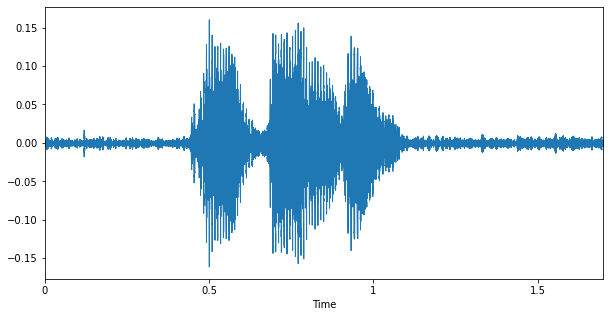

In [5]:
plt.figure(figsize=(10, 5))
librosa.display.waveplot(y, sr=sr)

### We need to apply a Short-time Fourier transform to visualize the spectrogram

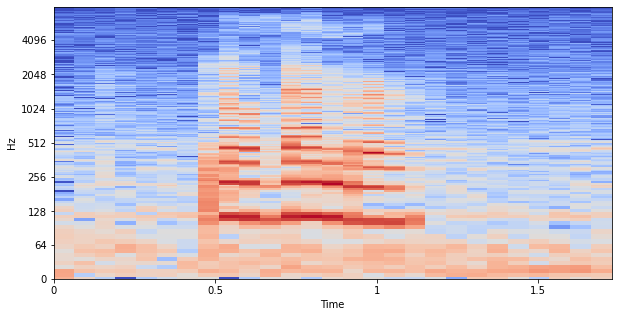

In [7]:
# Appply a stft to our signal
hop_length=1024

### START CODE HERE ###

y_stft = 

#Convert an amplitude spectrogram to dB-scaled spectrogram.
y_db = 

### END CODE HERE ###

## Plot spectrogram
plt.figure(figsize=(10, 5))
librosa.display.specshow(y_db, y_axis='log', sr=sr, hop_length=hop_length,
                         x_axis='time')

# Extract Melspectrogram and MFCC with librosa

### Simple Method

In [8]:
y, sr = librosa.load(audio, sr=16000)
my_mfcc = librosa.feature.mfcc(y=y, sr=sr)
print(my_mfcc)

[[-468.90536    -466.18674    -467.65518    ... -464.9103
  -467.73865    -473.01      ]
 [ 108.08021     108.49103     108.63214    ...  110.365
   109.4308      109.60148   ]
 [  16.919437     21.363747     21.034538   ...   19.603214
    21.81285      23.217796  ]
 ...
 [  10.29232       9.833668      7.855468   ...    2.7977767
     4.97297       5.0901995 ]
 [  -4.4333596    -3.272796     -2.9045534  ...    1.2865922
    -2.2123957    -4.8157434 ]
 [   0.61239916   -3.1966183    -4.0152507  ...   -2.361408
    -6.1263995    -7.698302  ]]


In [9]:
print("MFCC shape:", my_mfcc.shape)

MFCC shape: (20, 54)


- What is 20? what is 54?
- 20 refers to the number of mfcc's while 54 is the time dimension.

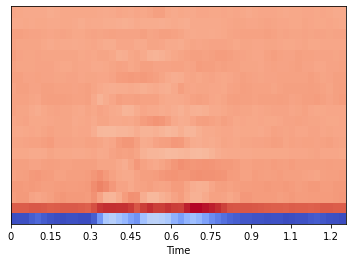

In [10]:
fig, ax = plt.subplots()
img = librosa.display.specshow(my_mfcc, x_axis='time', ax=ax)

### 13 MFCC are often enough for classification or speech recognition
- Try extracting only 13 MFCC's 

In [12]:
### START CODE HERE ###
my_mfcc_13 = 

### END CODE HERE ###
print("MFCC shape:", my_mfcc_13.shape)

MFCC shape: (13, 54)


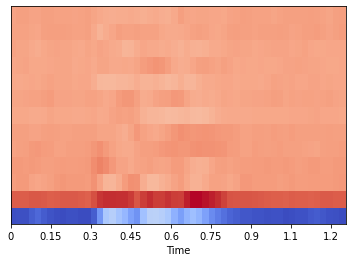

In [13]:
fig, ax = plt.subplots()
img = librosa.display.specshow(my_mfcc_13, x_axis='time', ax=ax)

### We can also extract MFCCs after computing a custom log-melspectrogram

In [16]:
n_mfcc = 13
n_mels = 40
n_fft = 512
win_length = 400 
hop_length = 160 
window = 'hamming'
fmin = 20
fmax = 4000

y, sr = librosa.load(audio, sr=16000)

### START CODE HERE ###
# Insert correct parameters for librosa.stft(), librosa.feature.melspectrogram(), and librosa.feature.mfcc()

D = np.abs(librosa.stft(##))**2
    
S = librosa.feature.melspectrogram(##)
    
S_log = librosa.power_to_db(S)
    
final_mfcc = librosa.feature.mfcc(##)

### END CODE HERE ###

print(final_mfcc.shape)

(13, 170)


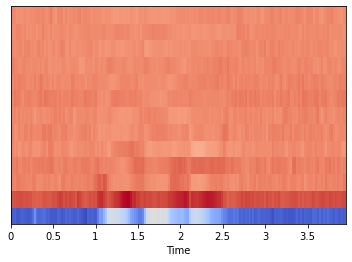

In [17]:
fig, ax = plt.subplots()
img = librosa.display.specshow(final_mfcc, x_axis='time', ax=ax)

# Extract MFCC with Kaldi
- It is easier if you work directly in your linux terminal but to display outputs I will use jupyter
- git clone https://github.com/abnerLing/torgo-speech_processing in the kaldi/egs/ folder if you haven't already
- work in the ./asr folder

## Create kaldi-required files for the 1 uttereance
- put files under data/ex2 (or whatever you want to name the folder)

In [19]:
!cd /home/abner/work/kaldi/egs/torgo-speech_processing/asr/data/ex2 && ls

spk2utt  utt2spk  wav.scp


In [20]:
!cd /home/abner/work/kaldi/egs/torgo-speech_processing/asr/data/ex2 && head *

==> spk2utt <==
november november

==> utt2spk <==
november november

==> wav.scp <==
november  /home/abner/work/data/torgo/MC01/Session2/wav_headMic/MC01_2_head_0019.wav


### To extract MFCCs, Kaldi requires wav.scp, spk2utt, utt2spk, and an mfcc.conf file

In [21]:
!cd /home/abner/work/kaldi/egs/torgo-speech_processing/asr/conf/ && ls

decode.config  decode_dnn.config  mfcc.conf


In [ ]:
## run ./steps/make_mfcc.sh --nj 1 data/ex2 exp/make_mfcc/ex2 

In [22]:
!cd /home/abner/work/kaldi/egs/torgo-speech_processing/asr/ && steps/make_mfcc.sh --nj 1 data/ex2 exp/make_mfcc/ex2 

steps/make_mfcc.sh --nj 1 data/ex2 exp/make_mfcc/ex2
utils/validate_data_dir.sh: WARNING: you have only one speaker.  This probably a bad idea.
   Search for the word 'bold' in http://kaldi-asr.org/doc/data_prep.html
   for more information.
utils/validate_data_dir.sh: Successfully validated data-directory data/ex2
steps/make_mfcc.sh: [info]: no segments file exists: assuming wav.scp indexed by utterance.
steps/make_mfcc.sh: Succeeded creating MFCC features for ex2


### You should now have several new files

In [23]:
!cd /home/abner/work/kaldi/egs/torgo-speech_processing/asr/data/ex2 && ls

conf  feats.scp    spk2utt  utt2num_frames  wav.scp
data  frame_shift  utt2dur  utt2spk


### The actual MFCC are located in the data folder as an ARK file

In [24]:
!cd /home/abner/work/kaldi/egs/torgo-speech_processing/asr/data/ex2/data && ls

raw_mfcc_ex2.1.ark  raw_mfcc_ex2.1.scp


In [25]:
#!pip install kaldiio ## useful for reading ARK files

import kaldiio

In [26]:
my_ark = "/home/abner/work/kaldi/egs/torgo-speech_processing/asr/data/ex2/data/raw_mfcc_ex2.1.ark"

d = kaldiio.load_ark(my_ark)
for key, numpy_array in d:
    kaldi_mfccs = numpy_array

In [33]:
# transpose matrix so we can plot with librosa
kaldi_mfccs = kaldi_mfccs.T

In [28]:
print(kaldi_mfccs.shape)
print(final_mfcc.shape) #librosa

(13, 168)
(13, 170)


### Slightly different, but that's because we are using Kaldi's default parameters.

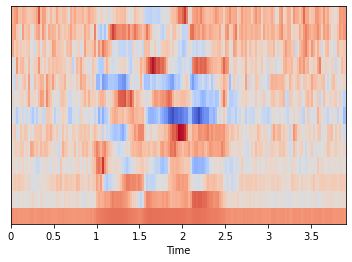

In [34]:
fig, ax = plt.subplots()
img = librosa.display.specshow(kaldi_mfccs, x_axis='time', ax=ax)

# Final Task
### Using Kaldi, extract all MFCCs from the TORGO train and test sets and put in a MFCC folder 
e.g.

In [35]:
!ls /home/abner/work/kaldi/egs/torgo-speech_processing/asr/mfcc

raw_mfcc_test.1.ark   raw_mfcc_train.3.ark  raw_mfcc_train.6.ark
raw_mfcc_test.1.scp   raw_mfcc_train.3.scp  raw_mfcc_train.6.scp
raw_mfcc_train.1.ark  raw_mfcc_train.4.ark  raw_mfcc_train.7.ark
raw_mfcc_train.1.scp  raw_mfcc_train.4.scp  raw_mfcc_train.7.scp
raw_mfcc_train.2.ark  raw_mfcc_train.5.ark  raw_mfcc_train.8.ark
raw_mfcc_train.2.scp  raw_mfcc_train.5.scp  raw_mfcc_train.8.scp
